In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns

**Описание данных**

Имеются следующие поля:
* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

убедимся,что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений

In [20]:
games_df = pd.read_csv('games.csv')
games_df.isna().sum()
games_df = games_df.dropna()

In [21]:
games_df.isna().sum()
games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
games_df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [24]:
scipy.stats.mode(games_df.Year)

ModeResult(mode=2009.0, count=1431)

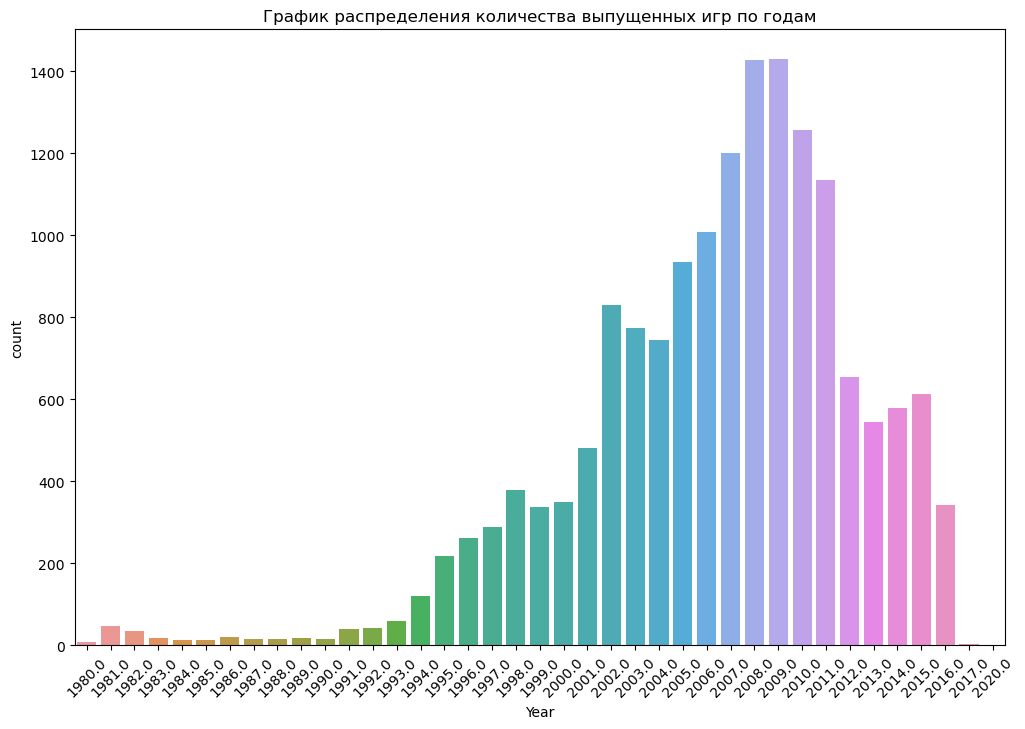

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data = games_df,x= games_df['Year'])
plt.xticks(rotation = 45)
plt.title('График распределения количества выпущенных игр по годам')
plt.show()

Медианный год больше, чем средний.  
Примерно половина игр была выпущена после 2007 года  
Мода равна 2009

In [26]:
games_df.query('Year>2007').shape[0]/games_df.shape[0]*100

49.063900313056294

На каких платформах произошло больше всего релизов?  

Оставим названия только тех платформ, частота встречаемости которых составляет более 7%. 

In [11]:
platform_percentage=games_df['Platform'].value_counts(normalize=True)*100
platform_percentage[platform_percentage>7]

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
Name: proportion, dtype: float64

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [53]:
publisher_percentage = games_df.Publisher.value_counts()
publisher_percentage

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

Сфокусируемся на играх от Nintendo. Посчитаем среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other)

In [14]:
nintendo_games = games_df.query('Publisher=="Nintendo"')
nintendo_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


In [28]:
nintendo_games[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['mean','median','std'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170


В регионе NA (North America) медианное значение объема продаж является наибольшим.

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Построим боксплот, где:    
по оси x будет расположен жанр игры (Genre)  
по оси у – объем продаж в Японии (JP_sales)

<Axes: xlabel='Genre', ylabel='JP_Sales'>

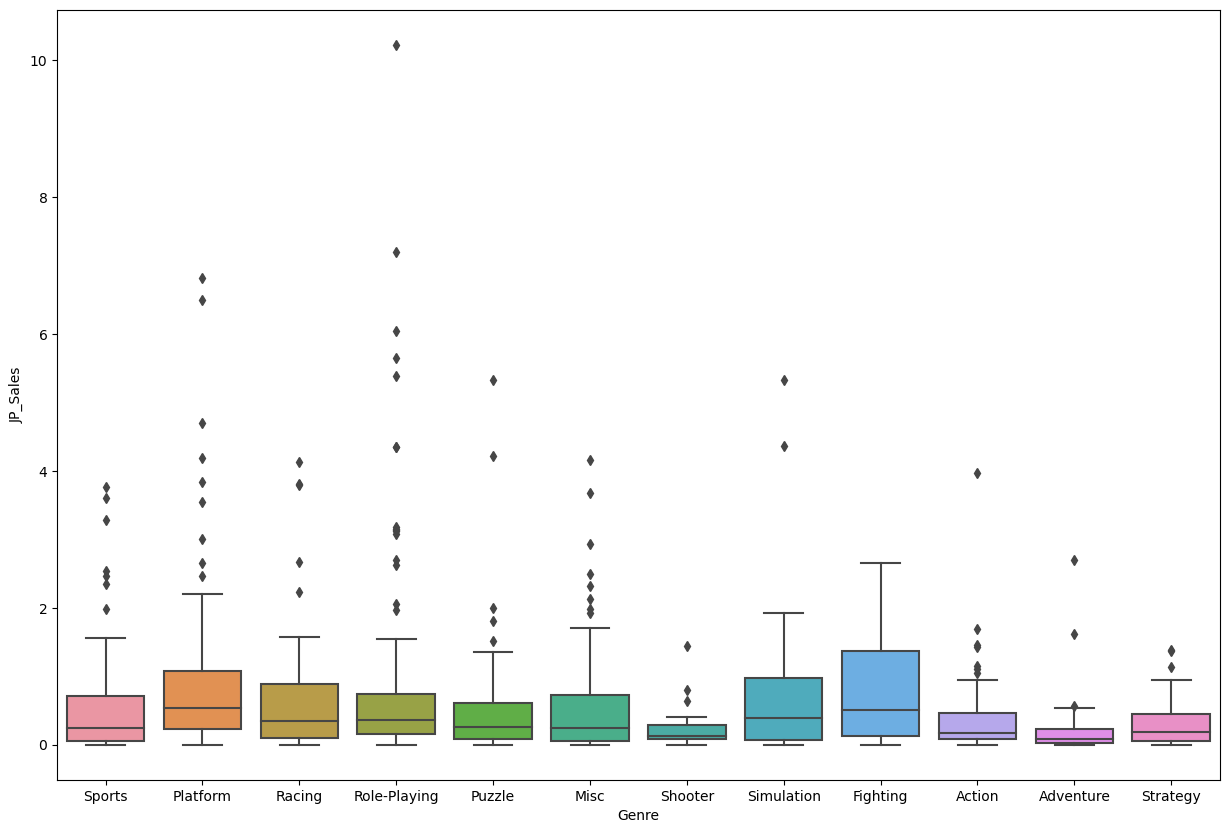

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=nintendo_games,x=nintendo_games['Genre'],y=nintendo_games['JP_Sales'])

Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation  
Наибольший межквартильный размах наблюдается у игр жанра Fighting  
Межквартильный размах у Strategy меньше, чем у Puzzle

Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

<Axes: xlabel='Year', ylabel='Global_Sales'>

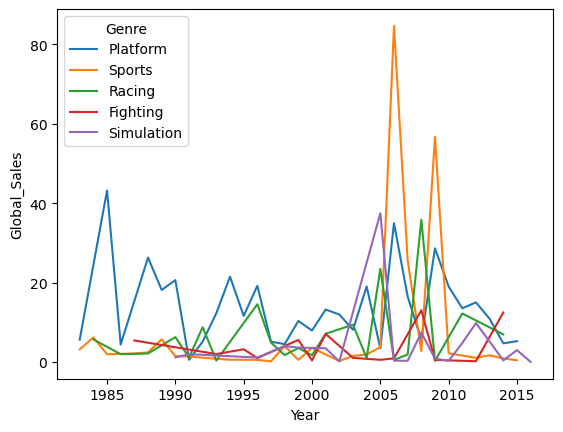

In [32]:
genres_n_years=nintendo_games.query('Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")')\
.groupby(['Year','Genre'],as_index=False).sum()
sns.lineplot(x=genres_n_years['Year'],y=genres_n_years['Global_Sales'],hue=genres_n_years['Genre'] ,data = genres_n_years)

Мы видим, что на отрезке 2005-2010 игры жанра Sports были наиболее популярны